## This code implements a linear model, included both analytical and numerical methods

In [1]:
# Import library
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Generate data
N = 1000 # number of samples
x = np.random.rand(N,1)
# Add random noise
y =  4.54 + 3.15*x + np.random.randn(N,1)

In [3]:
# Add column ones 
ones = np.ones((x.shape[0],1))
Xhat = np.concatenate((ones, x), axis = 1)

## Method 1. Analytical Method

In [4]:
# Calculate by using closed-form
A = np.dot(Xhat.T, Xhat)
b = np.dot(Xhat.T, y)
w = np.dot(np.linalg.pinv(A), b)
w

array([[4.48907586],
       [3.2230008 ]])

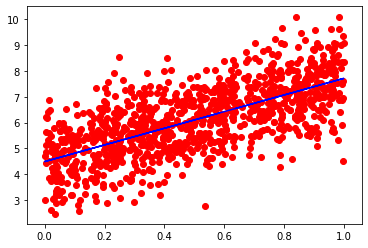

In [5]:
# Plot
plt.scatter(x, y, color = 'red')
plt.plot(x, np.dot(Xhat, w), color = 'blue')

## Method 2. Numerical Method

In [6]:
# Calculate by applying Gradient Decent 
def grad_mse(w):
    err = np.dot(Xhat, w) - y
    return (2/N)*np.dot(Xhat.T, err)


def mse_lr(w):
    err = np.dot(Xhat, w) - y
    return (1/N)*np.linalg.norm(err)**2


def GD(w, alpha, eta):
    """
    alpha: step size
    eta: stop condition
    """
    for i in range(1000):
        w_new = w - alpha*grad_mse(w)
        if np.linalg.norm(grad_mse(w)) < eta:
            break
        w = w_new
    print (f"MSE error is {mse_lr(w_new)} after {i} iterations")
    return w_new

In [7]:
w2 = np.array([[25083], [9687]]) # Initial guess
alpha = 0.1
eta = 1e-3
w_new = GD(w2, alpha, eta)

MSE error is 1.0130787485921964 after 979 iterations


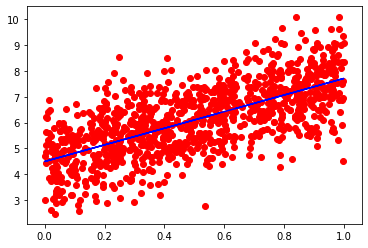

In [8]:
# Plot
plt.scatter(x, y, color = 'red')
plt.plot(x, np.dot(Xhat, w_new), color = 'blue')